Question 1:

h= 0.1  RK took  0.0019958019256591797 sn.  Order: 2.4084416715688737
h= 0.1  RK45 took  0.0 sn.  Order: 2.4084416715688612
h= 0.005  RK took  0.02929401397705078 sn.  Order: 2.101979388949976
h= 0.005  RK45 took  0.021548748016357422 sn.  Order: 2.101979388949976
h= 0.001  RK took  0.17818212509155273 sn.  Order: 2.0748037226844103
h= 0.001  RK45 took  0.13459157943725586 sn.  Order: 2.0748037226844103


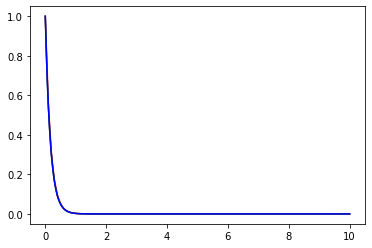

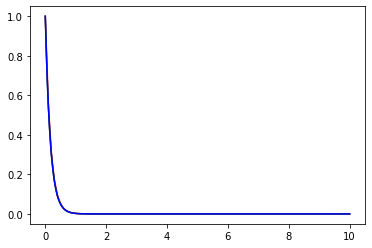

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

def fun1(t,y):
    f=-6*y
    return f

def rungeKutta(h, t, yold, f): 
    k1 = h * f(t, yold) 
    k2 = h * f(t+(h/3), yold+(k1/3)) 
    k3 = h * f(t+(2*h/3), yold - (k1/3) + k2) 
    k4 = h * f(t + h, yold + k1 -k2 + k3) 
    ynew = yold + (1/8)*(k1 + 3*k2 + 3*k3 + k4) 
  
    return ynew 

def RK45Classic(h,t,yold,f):
    k1=h*f(t,yold)
    k2=h*f(t+h/2,yold+k1/2)
    k3=h*f(t+h/2,yold+k2/2)
    k4=h*f(t+h,yold+k3)
    ynew=yold+(1/6)*(k1+2*k2+2*k3+k4)
    return ynew

harray=[0.1,0.005,0.001] # Timestep sizes
colors=['r','g','b'] #Plot colors for each stepsize
y0=1.0 #initial value
T=10 #final time
c=0

for h in harray:
    N=int(T/h) # number of timesteps
    t=np.linspace(0,T,N)
    y_RK=np.zeros(t.size)
    y_RK45=np.zeros(t.size)
    y_RK[0]=y0
    y_RK45[0]=y0
    
    t0=time.time()
    for i in range(0,N-1):
        y_RK[i+1]= rungeKutta(h,t[i],y_RK[i],fun1)
    t_RK=time.time()-t0
    
    t0=time.time()
    for i in range(0,N-1):
        y_RK45[i+1]= RK45Classic(h,t[i],y_RK45[i],fun1)
    t_RK45=time.time()-t0
    plt.figure(1) 
    plt.plot(t,y_RK,colors[c])
    plt.figure(2)
    plt.plot(t,y_RK45,colors[c])
    c=c+1
    
    #Order of Method:
    y_true=np.exp(-6*t[1])
    error1=abs(y_RK[1]-y_true)
    error2=abs(y_RK45[1]-y_true)
    Order1=np.log(error1)/np.log(h)
    Order2=np.log(error2)/np.log(h)
    
    print("h=",h," RK took ",t_RK, "sn.  Order:",Order1)
    print("h=",h," RK45 took ",t_RK45, "sn.  Order:",Order2)

Questioin 5:

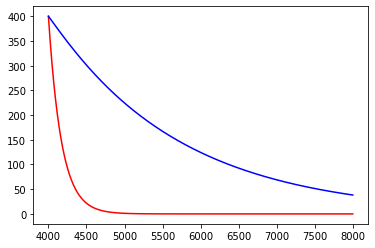

In [9]:
import numpy as np
import matplotlib.pyplot as plt

h=0.078; #311/4000
N=int(4000/h); # number of timesteps
t=np.linspace(4000,8000,N);

#Function for Lambda 0.0059 
def fun2(t,y):
    k1=0.1233;
    k2=0.00532;
    lm=0.0059;
    t0=3689.21;
    f=k1*np.exp(-k2*(t-t0))-lm*y;
    return f

#Function for Lambda 0.00059
def fun3(t,y):
    k1=0.1233;
    k2=0.00532;
    lm=0.00059;
    t0=3689.21;
    f=k1*np.exp(-k2*(t-t0))-lm*y;
    return f
M=np.zeros(t.size)
M[0]=400; #Initial Value;

for i in range(0,N-1):
        M[i+1]= rungeKutta(h,t[i],M[i],fun2)

plt.plot(t,M,'r')

for i in range(0,N-1):
        M[i+1]= rungeKutta(h,t[i],M[i],fun3)
plt.plot(t,M,'b')

Questioin 6:

Last-1 Value: 0.20838297215141452
Last Value: 0.20412930426761713


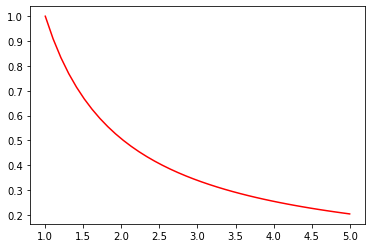

In [11]:
def fun4(t,y):
    f=-y**2
    return f

y0=1;
h=0.1;
N=int(4/h); # number of timesteps
t=np.linspace(1,5,N);

y_AB4=np.zeros(t.size)
y_AB4[0]=y0;
for i in range(0,3):
        y_AB4[i+1]= rungeKutta(h,t[i],y_AB4[i],fun4)


k1=fun4(t[2],y_AB4[2]);
k2=fun4(t[1],y_AB4[1]);
k3=fun4(t[0],y_AB4[0]);

for i in range(3,N-1):
    k4 = k3
    k3 = k2
    k2 = k1
    k1 = fun4(t[i],y_AB4[i])
    y_AB4[i+1] = y_AB4[i] + (h/24)*(55*k1-59*k2+37*k3-9*k4)    

print("Last-1 Value:",y_AB4[N-2])
print("Last Value:",y_AB4[N-1])

plt.plot(t,y_AB4,'r')